# C-Arm Calibration Pipeline Example

#### Import the necessary libraries

In [1]:
import cv2
import numpy as np
import itertools as itr
import matplotlib.pyplot as plt
from matplotlib import cm
from pathlib import Path

from CCalibration import XRaySeg

### Testing XRaySeg

Initialize object:

In [54]:
img1 = "BONTA.XA._.3.1.2021.11.24.14.29.43.343750.478545_Fiducial_Centered_0_Box_01.BMP"
img2 = "BONTA.XA._.22.1.2021.11.24.14.29.43.343750.479210_Fiducial_Centered_0_Spine_01.BMP"
img3 = "BONTA.XA._.15.1.2021.11.24.14.29.43.343750.478965_Fiducial_Tilt_60_Box_01.BMP"
img4 = "BONTA.XA._.19.1.2021.11.24.14.29.43.343750.479105_Fiducial_Orbit_60_Box_01.BMP"
img5 = "BONTA.XA._.23.1.2021.11.24.14.29.43.343750.479245_Fiducial_Orbit_30_Spine_01.BMP"
img6 = "BONTA.XA._.23.1.2021.11.24.14.29.43.343750.479245_Fiducial_Orbit_30_Spine_01.BMP"
img7 = "BONTA.XA._.26.1.2021.11.24.14.29.43.343750.486530_Fiducial_Tilt_30_Spine_01.BMP"
central_distorted = "undistorted/BONTA.XA._.3.1.2021.11.24.14.29.43.343750.478545_Fiducial_Centered_0_Box_01_Distorted.PNG"
obj = XRaySeg("dataset/" + img3)

#### Segmentation 
Segment the image and find the (x,y) pixel coordinate of the fiducial markers.

##### Parametric Segmentation

Number of fiducial markers detected: 16


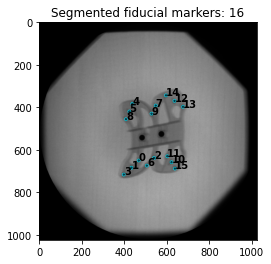

In [60]:
points = obj.segment(minDist = 5, minR = 1, maxR = 8, prm1 = 30, prm2 = 11)
obj.contour()
obj.visualize(save_image = True)

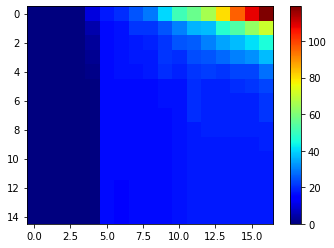

In [56]:
results = obj.segment_matrix(3,20,10,25)

Text(0, 0.5, 'Radius')

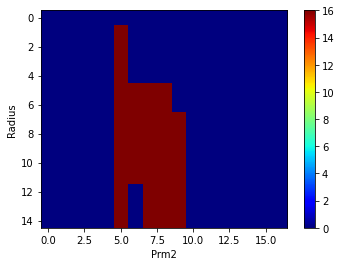

In [57]:
copy_results = results.copy()
copy_results[results!=16] = 0
color_map = plt.imshow(copy_results)
color_map.set_cmap("jet")
plt.colorbar()
plt.xlabel("Prm2")
plt.ylabel("Radius")

In [59]:
print(copy_results)
R_search = np.array(range(3,20))
Prm2_search = np.array(range(10,25))

I = np.nonzero(copy_results)
print(f"Prm2: {Prm2_search[I[0][0]]}")
print(f"r: {R_search[I[1][0]]}")

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 16.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 16.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 16.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 16.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 16. 16. 16. 16.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 16. 16. 16. 16.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 16. 16. 16. 16. 16.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 16. 16. 16. 16. 16.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 16. 16. 16. 16. 16.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 16. 16. 16. 16. 16.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 16. 16. 16. 16. 16.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 16.  0. 16. 16. 16.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 16.  0. 16. 16. 16.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 

##### Parametric Segmentation
The segment_search() function automatically find the max radius and parameter 2 values that result in an acceptable number of segmentations corresponding to the 

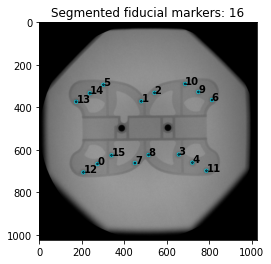

In [8]:
points = obj.segment_search(16,max_iter = 10,verbose = False)
obj.contour()
obj.visualize()

## Testing CCalibration 

In [1]:
from CCalibration import CCalibration
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

Initialize object

In [2]:
calib = CCalibration()

Load Survigision data from excel and set the parameters for the calibration.

In [3]:
df = pd.read_excel (r'..\Surgivision.xlsx')
real_coordinates = np.array(df)[0:16,0:3].astype(float)

calib.set_parameters(real_coordinates,coll_threshold=0.5,max_iter_seg = 10)

#If you want to plot the coordinates
'''
plt.scatter(real_coordinates[:,0],real_coordinates[:,2])
for i in range(16):
    xy = (real_coordinates[i,0],real_coordinates[i,2])
    plt.annotate(f"{i}",xy=xy,size=15,fontweight='bold')
'''

C:\Users\mbont\OneDrive - UBC\Academic\ELEC523 Medical Imaging\ece523-medical-imaging-project\CCalibration.py:391: RuntimeWarning: invalid value encountered in sqrt
  D = np.sqrt(np.sum(pt_array ** 2, axis=1)[:, None] + np.sum(pt_array ** 2, axis=1)[None] - 2 * np.dot(pt_array, pt_array.T))


'\nplt.scatter(real_coordinates[:,0],real_coordinates[:,2])\nfor i in range(16):\n    xy = (real_coordinates[i,0],real_coordinates[i,2])\n    plt.annotate(f"{i}",xy=xy,size=15,fontweight=\'bold\')\n'

Find and segments the fiducial markers. You can choose to visualize the image. The image has random labels at this point.

Loading and segmenting training image.
Number of fiducial markers detected: 16
	 Image segmented correctly, 16 fiducial markers found.


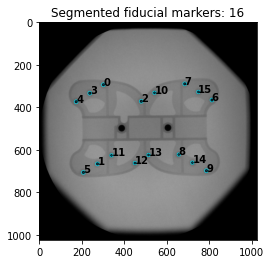

In [7]:
central = "dataset/BONTA.XA._.3.1.2021.11.24.14.29.43.343750.478545_Fiducial_Centered_0_Box_01.BMP"
central_distorted = "dataset/undistorted/BONTA.XA._.3.1.2021.11.24.14.29.43.343750.478545_Fiducial_Centered_0_Box_01_Distorted.PNG"
orbit30 = "dataset/BONTA.XA._.13.1.2021.11.24.14.29.43.343750.478895_Fiducial_Tilt_45_Box_01.BMP"
data_2 = "dataset/BONTA.XA._.15.1.2021.11.24.14.29.43.343750.478965_Fiducial_Tilt_60_Box_01.BMP"
img1 = "BONTA.XA._.3.1.2021.11.24.14.29.43.343750.478545_Fiducial_Centered_0_Box_01.BMP"
img2 = "BONTA.XA._.22.1.2021.11.24.14.29.43.343750.479210_Fiducial_Centered_0_Spine_01.BMP"
img3 = "BONTA.XA._.15.1.2021.11.24.14.29.43.343750.478965_Fiducial_Tilt_60_Box_01.BMP"
img4 = "BONTA.XA._.19.1.2021.11.24.14.29.43.343750.479105_Fiducial_Orbit_60_Box_01.BMP"
img5 = "BONTA.XA._.23.1.2021.11.24.14.29.43.343750.479245_Fiducial_Orbit_30_Spine_01.BMP"

Pt = calib.extract_fiducials(central, visualize = True)

Label the segmented fiducial markers according to the order of the surgivisio points. If the labelling is incorrect, you can use the function below to correct it.

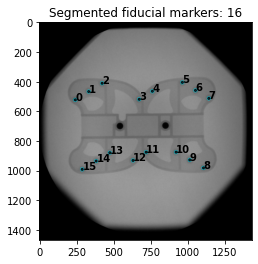

In [12]:
new = calib.label_markers()
calib.set_labels(new,visualize=True)

Mannual labelling will prompt you to introduce the old label and replace it with a new one. Be careful when you have repeated labels in the image. Then it will save this labels and show the new labels.

In [13]:
#calib.set_labels(np.array(range(16)),visualize=True)
pt = calib.get_labels()
img4=[7,5,1,0,6,4,2,3,14,15,8,9,11,12,10,13]
#print(pt)
#calib.set_labels(img4)

Calculate collinear sets and visualize them:

array([[ 0,  2,  5],
       [ 3,  8,  9],
       [ 6, 10, 14],
       [11, 12, 13]])

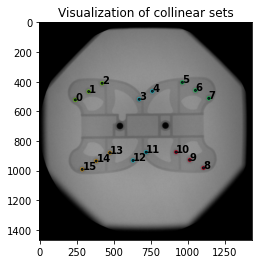

In [14]:
calib.set_parameters(real_coordinates,coll_threshold=1.5,max_iter_seg = 20)
calib.extract_collinear(0.6,True)

In [15]:
calib.compute_dlt([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

Error S[-1]: 0.00


(array([[ 5.80781215e-02, -1.51621559e+00,  8.38703719e+00,
          1.45051235e+03],
        [ 8.30372418e+00, -1.63741700e+00, -6.78504241e-02,
          6.95583088e+02],
        [-4.78437076e-05, -2.05375336e-03,  5.01875286e-05,
          1.00000000e+00]]),
 0.9431940081867886)

In [16]:
d = calib.evaluate_dlt([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
print(d)

0.9893500711575168


#### Evaluation of distortion

In [10]:
dist_file_name = ""

tmp = cv2.imread(file_name, cv2.IMREAD_COLOR)
distorted = cv2.cvtColor(tmp, cv2.COLOR_BGR2GRAY)



NameError: name 'cv2' is not defined